In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleavland = pd.read_csv('DSBDALExam DataSets/HeartDisease/Cleavland.csv', header=None)
hungarian = pd.read_csv('DSBDALExam DataSets/HeartDisease/hung.csv', header=None)
switzerland = pd.read_csv('DSBDALExam DataSets/HeartDisease/Switzerland.csv', header=None)

In [4]:
combined = pd.concat([cleavland, hungarian, switzerland])

In [6]:
combined.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [7]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [14]:
combined.replace('?', pd.NA, inplace=True)
combined.dropna(inplace=True)
combined = combined.apply(pd.to_numeric)
combined = combined[(combined>=0).all(1)]

<Figure size 864x576 with 0 Axes>

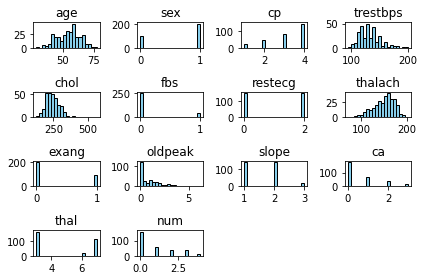

In [33]:
plt.figure(figsize=(12,8))
combined.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

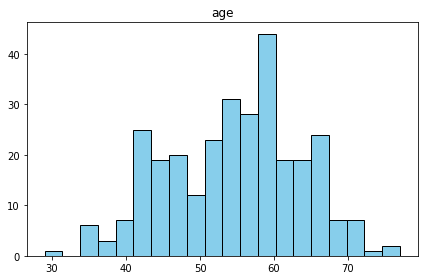

In [34]:
plt.figure(figsize=(12,8))
combined.hist(column='age', bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

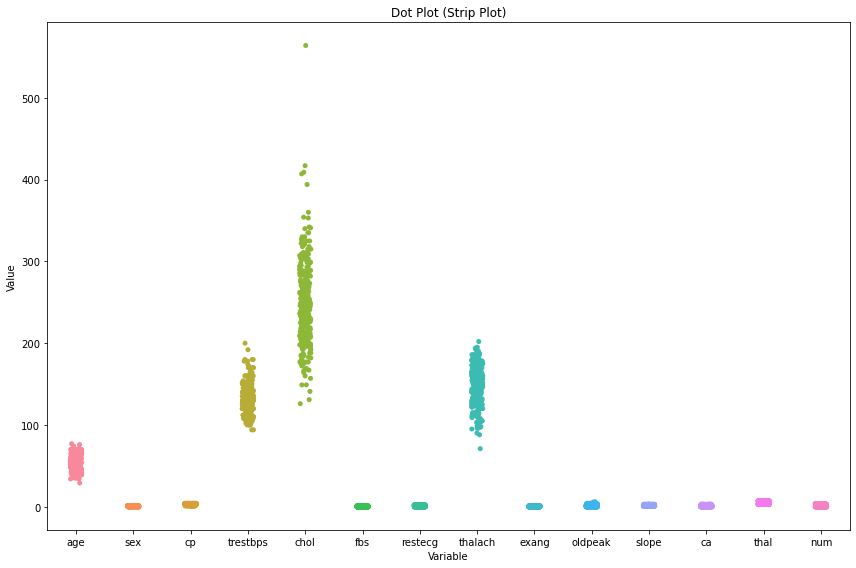

In [38]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=combined, jitter=True)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Dot Plot (Strip Plot)')
plt.tight_layout()
plt.show()

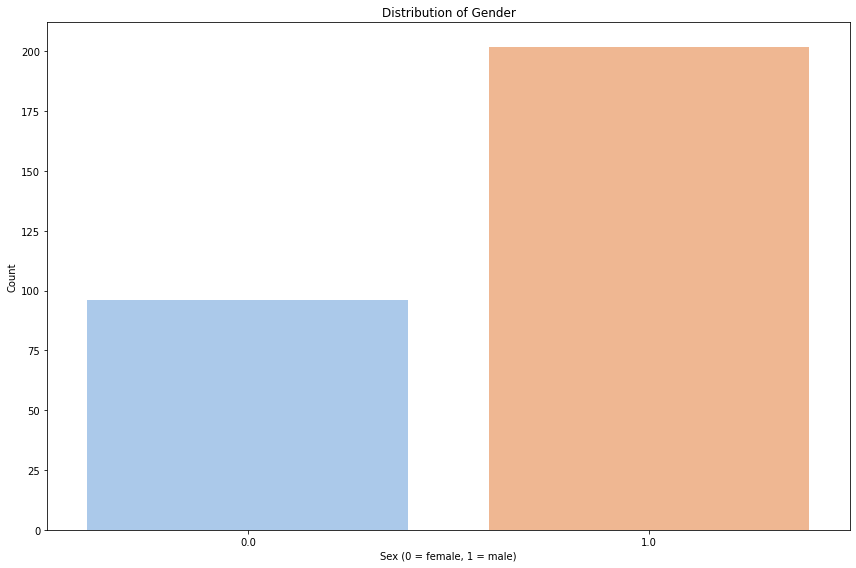

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(data=combined, x='sex', palette='pastel')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.tight_layout()
plt.show()

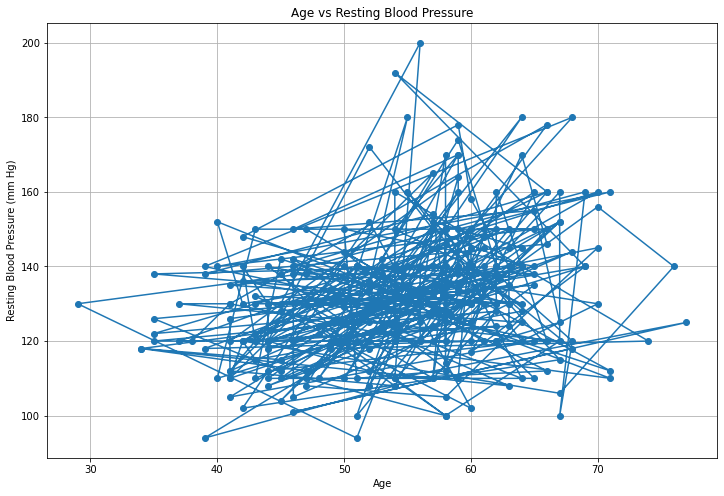

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(combined['age'], combined['trestbps'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.title('Age vs Resting Blood Pressure')
plt.grid(True)
plt.show()

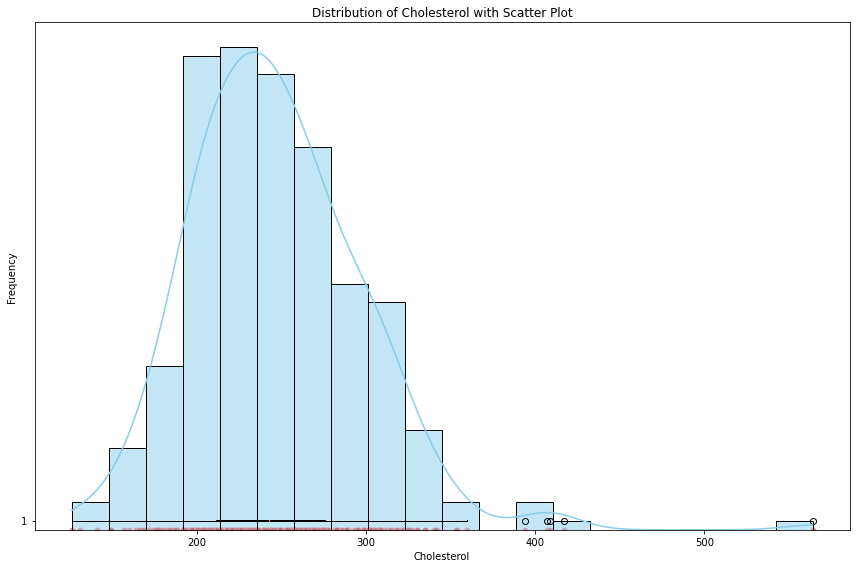

In [30]:
plt.figure(figsize=(12, 8))
plt.boxplot(combined['chol'], vert=False)
sns.histplot(combined['chol'], color='skyblue', bins=20, kde=True)
sns.scatterplot(x=combined['chol'], y=[0]*len(combined), color='red', marker='o', alpha=0.5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol with Scatter Plot')
plt.tight_layout()
plt.show()